***This notebook owes to beluga's kernels, especialy this one, for the most part.***

**If you use Jupyter Lab, you have to install the renderer extensions for plotly.**

https://github.com/jupyterlab/jupyter-renderers
https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension

**If you want to export Plotly graphs as static images, you have to install `orca` and `psutil`.**

https://github.com/plotly/orca#installation
https://plot.ly/python/static-image-export/

---

In [1]:
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
py.init_notebook_mode(connected=True)  # You can plot your graphs offline inside a Jupyter Notebook Environment.
print(f"Plotly version: {plotly.__version__}")  # output: 4.3.0

Plotly version: 4.3.0


In [2]:
"""
Colors of Viridis: 
https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
"""
C = ['#3D0553', '#4D798C', '#7DC170', '#F7E642']  

'\nColors of Viridis: \nhttps://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html\n'

In [57]:
class DataLoader:
    def __init__(self):
        pass
    
    def load_titanic(self, group=None):
        df = sns.load_dataset("titanic")
        if not group==None:
            df = df.groupby(group)["survived"].mean().to_frame().reset_index()
        return df

    def load_iris(self):
        return sns.load_dataset("iris")

    def load_tips(self, group=None):
        df = sns.load_dataset("tips")
        if not group==None:
            df = df.groupby(group)["tip"].mean().to_frame().reset_index()
        return df

    def load_flights(self, group=None):
        df = sns.load_dataset("flights")
        if not group==None:
            df = df.groupby([group])["passengers"].sum().to_frame().reset_index()
        return df

In [22]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go


class PlotlyWrapper:
    def __init__(self):
        self.colors = ["#3D0553", "#4D798C", "#7DC170", "#F7E642"]

    def _convert_to_str(self, arr):
        return np.array(arr, dtype=str)

    def _plotly_layout(self, title=None, xtitle=None, ytitle=None):
        return go.Layout(
            title=title,
            xaxis=dict(title=xtitle, ticklen=5, zeroline=False, gridwidth=2),
            yaxis=dict(title=ytitle, ticklen=5, gridwidth=2),
        )

    def distplot(self, data, col, bin_dict=None, title=None, xtitle=None, ytitle=None):
        trace = [
            go.Histogram(
                x=data[col].values,
                histfunc="count",
                marker=dict(color=self.colors[0]),
                xbins=bin_dict,
            )
        ]
        layout = self._plotly_layout(title=title, xtitle=xtitle, ytitle=ytitle)
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)

    def boxplot(self, data, col, title=None, xtitle=None, ytitle=None):
        trace = [go.Box(y=data[col].values, marker=dict(color=self.colors[0]))]
        layout = self._plotly_layout(title=title, xtitle=xtitle, ytitle=ytitle)
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)

    def barplot(self, data, xcol, ycol, title=None, xtitle=None, ytitle=None):
        trace = [
            go.Bar(
                x=self._convert_to_str(data[xcol].values),
                y=data[ycol].values,
                text=data[ycol].values,
                textposition="auto",
                marker=dict(
                    color=data[ycol].values,
                    colorscale="Viridis",
                    showscale=True,
                    reversescale=True,
                ),
            )
        ]
        layout = self._plotly_layout(title=title, xtitle=xtitle, ytitle=ytitle)
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)

    def countplot(self, data, col, title=None, xtitle=None, ytitle=None):
        trace = [
            go.Histogram(
                x=data[col].values, histfunc="count", marker=dict(color=self.colors[0])
            )
        ]
        layout = self._plotly_layout(title=title, xtitle=xtitle, ytitle=ytitle)
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)

    def scatterplot(
        self, data, xcol, ycol, size=1, title=None, xtitle=None, ytitle=None
    ):
        trace = [
            go.Scatter(
                x=self._convert_to_str(data[xcol].values),
                y=data[ycol].values,
                mode="markers",
                marker=dict(
                    sizemode="diameter",
                    sizeref=1,
                    size=data[ycol].values ** size,
                    color=data[ycol].values,
                    colorscale="Viridis",
                    reversescale=True,
                    showscale=True,
                ),
                text=self._convert_to_str(data[xcol].values),
            )
        ]
        layout = go.Layout(
            autosize=True,
            title=title,
            hovermode="closest",
            xaxis=dict(title=xtitle, ticklen=5, zeroline=False, gridwidth=2),
            yaxis=dict(title=ytitle, ticklen=5, gridwidth=2),
            showlegend=False,
        )
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)

    def lineplot(
        self,
        data,
        xcol,
        ycol,
        title=None,
        xtitle=None,
        ytitle=None,
        linewidth=2,
        rangeslider=False,
        slider_type="date",
    ):
        if rangeslider is True:
            xaxis = dict(
                title=xtitle,
                ticklen=5,
                zeroline=False,
                gridwidth=2,
                rangeslider=dict(visible=True),
                type=slider_type,
            )
        else:
            xaxis = dict(title=xtitle, ticklen=5, zeroline=False, gridwidth=2)

        if type(ycol) == list:
            trace = []
            for i in range(len(ycol)):
                t = go.Scatter(
                    x=data[xcol].values,
                    y=data[ycol[i]].values,
                    mode="lines",
                    name=data[ycol[i]].name,
                    line=dict(width=linewidth, color=self.colors[i]),
                )
                trace.append(t)
        else:
            trace = [
                go.Scatter(
                    x=data[xcol].values,
                    y=data[ycol].values,
                    mode="lines",
                    name=data[ycol].name,
                    line=dict(width=linewidth, color=self.colors[0]),
                )
            ]
        layout = go.Layout(
            title=title, xaxis=xaxis, yaxis=dict(title=ytitle, ticklen=5, gridwidth=2)
        )
        fig = go.Figure(data=trace, layout=layout)
        return py.iplot(fig, show_link=False)


In [59]:
dataloader = DataLoader()
plty = PlotlyWrapper()

## Histogram

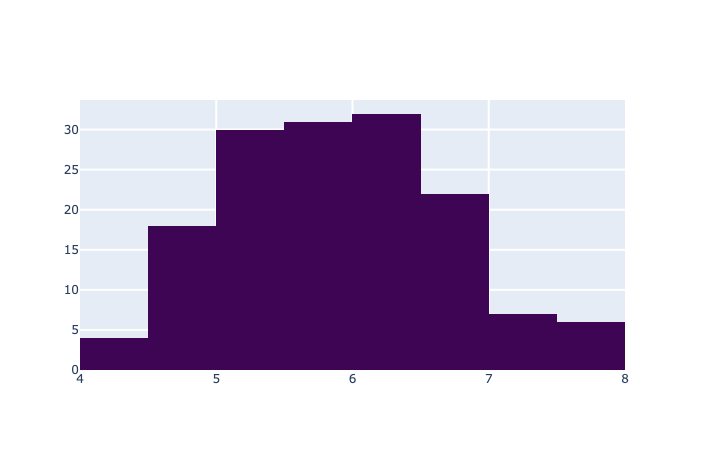

In [60]:
df = dataloader.load_iris()
plty.distplot(df, col="sepal_length")

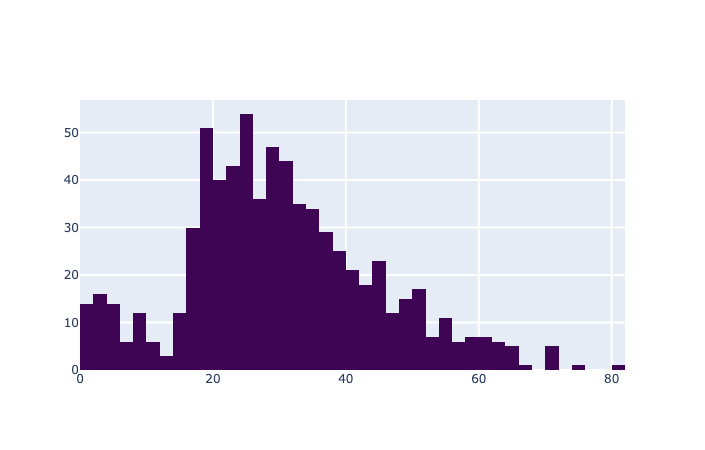

In [61]:
df = dataloader.load_titanic()
plty.distplot(df, col="age")

## Boxplot

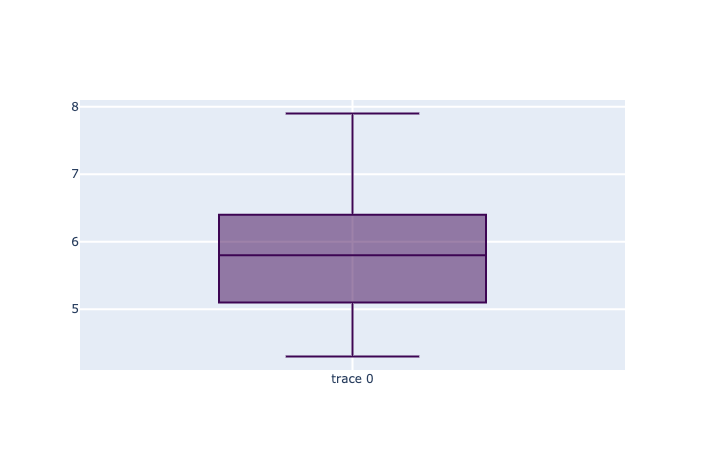

In [62]:
df = dataloader.load_iris()
plty.boxplot(df, col="sepal_length")

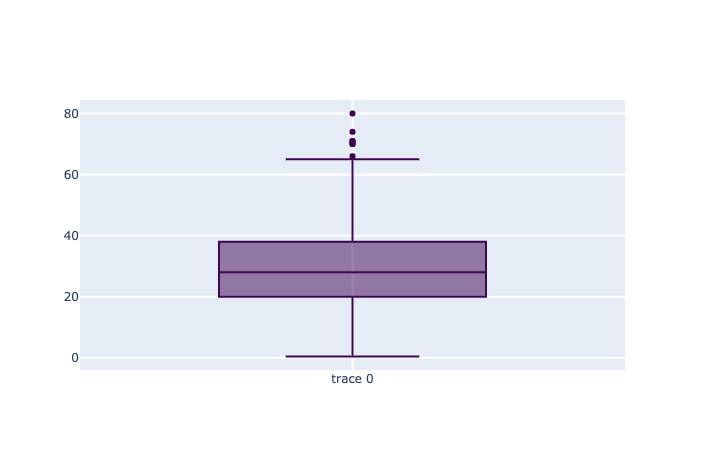

In [63]:
df = dataloader.load_titanic()
plty.boxplot(df, col="age")

## Barplot

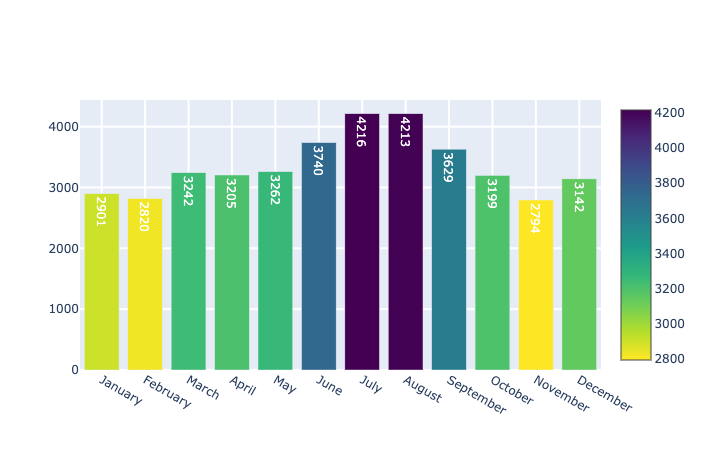

In [64]:
df = dataloader.load_flights(group="month")
plty.barplot(df, xcol="month", ycol="passengers")

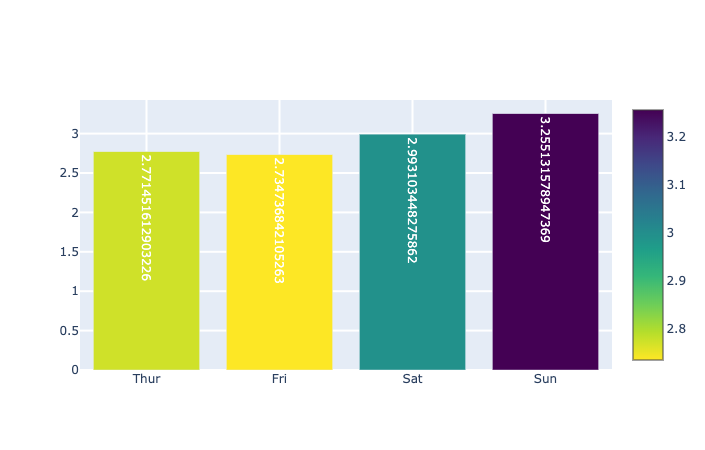

In [65]:
df = dataloader.load_tips(group="day")
plty.barplot(df, xcol="day", ycol="tip")

## Countplot

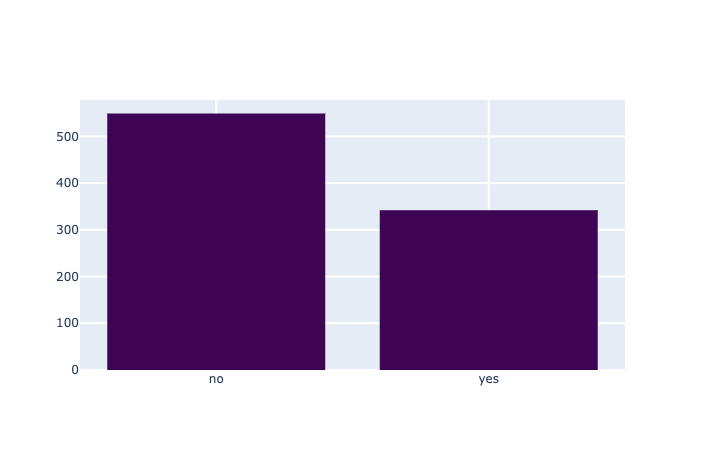

In [66]:
df = dataloader.load_titanic()
plty.countplot(df, col="alive")

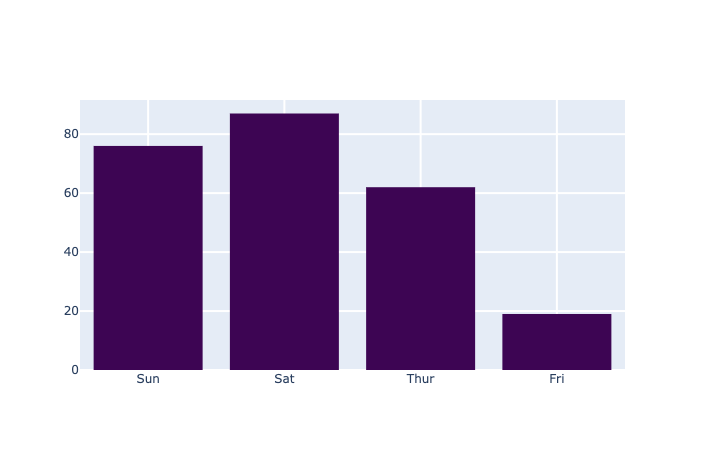

In [67]:
df = dataloader.load_tips()
plty.countplot(df, col="day")

## Scatterplot

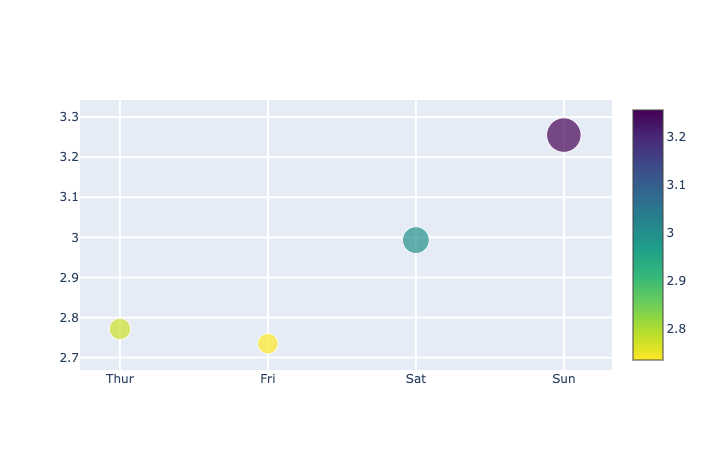

In [68]:
df = dataloader.load_tips(group="day")
plty.scatterplot(df, xcol="day", ycol="tip", size=3)

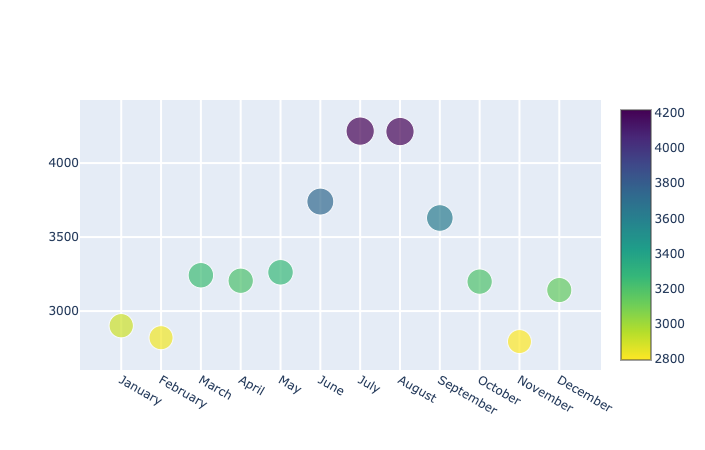

In [47]:
df = dataloader.load_flights("month")
plty.scatterplot(df, xcol="month", ycol="passengers", size=0.4)

## Lineplot

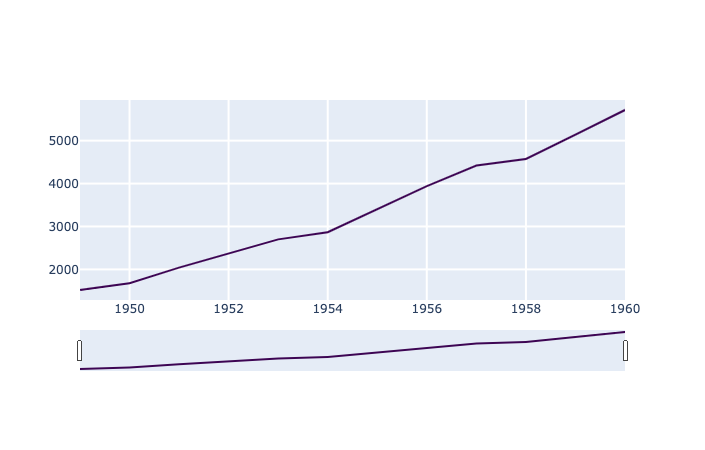

In [40]:
df = dataloader.load_flights("year")
plty.lineplot(df, xcol="year", ycol="passengers", rangeslider=True)

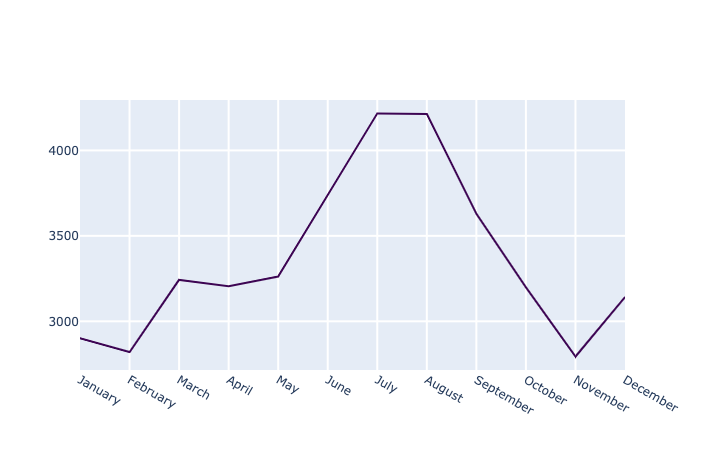

In [84]:
df = dataloader.load_flights("month")
plty.lineplot(df, xcol="month", ycol="passengers", rangeslider=False)

---

- References  
  - https://www.kaggle.com/gaborfodor/summary-budapest-pythons
  - https://www.kaggle.com/gaborfodor/exploratory-data-analysis-external-data
  - https://www.kaggle.com/gaborfodor/the-speed-the-acceleration-and-the-collision